In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import my_afml_fncs
import matplotlib as mpl


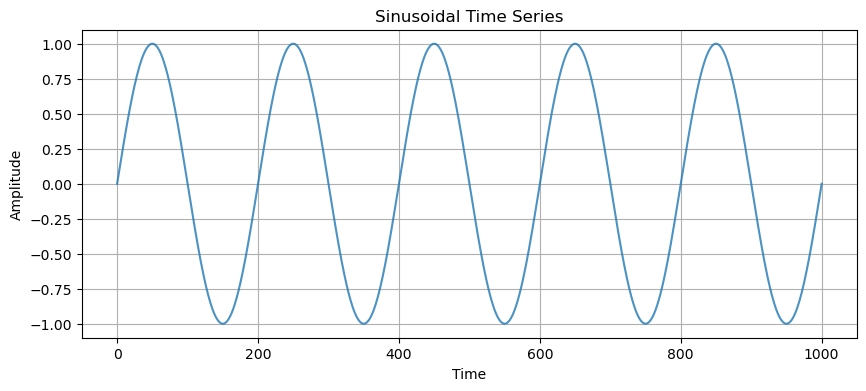

In [2]:

# Parameters
num_samples = 1000  # Number of samples
t = np.linspace(0, 1000, num_samples)  # Time vector
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
phase = 0  # Phase shift

# Generate sinusoidal time series
sinusoidal_series = amplitude * np.sin(2 * np.pi * frequency * t / num_samples + phase)

# Plot the sinusoidal time series
plt.figure(figsize=(10, 4))
plt.plot(t, sinusoidal_series, linestyle='-', alpha=0.8)
plt.title("Sinusoidal Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


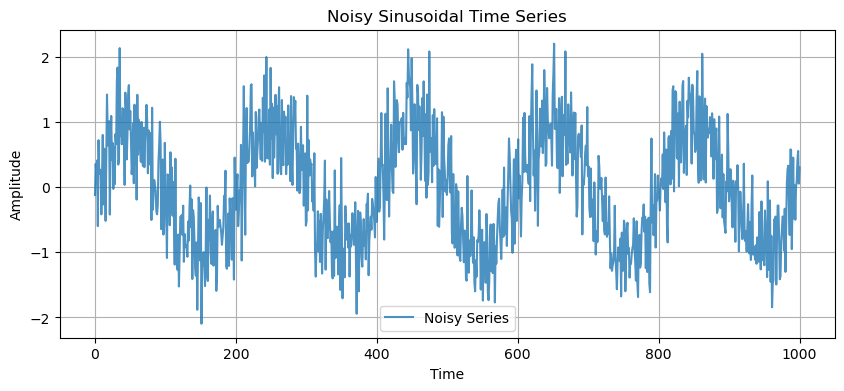

In [3]:
# Add noise to the sinusoidal series
noise = np.random.normal(0, 0.5, num_samples)  # Gaussian noise with mean 0 and std 0.1
noisy_series = sinusoidal_series + noise

# Plot the noisy time series
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_series, linestyle='-', alpha=0.8, label='Noisy Series')
plt.title("Noisy Sinusoidal Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_result = adfuller(noisy_series)

# Extract the test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

adf_statistic, p_value

(-2.2399794204581913, 0.1920564018452074)

In [5]:
adjusted_series = noisy_series + 0.2

In [6]:
cumulative_adjusted_series = np.cumsum(adjusted_series)


In [7]:
adf_cumulative_adjusted_series = adfuller(cumulative_adjusted_series)

In [8]:
# Extract the test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

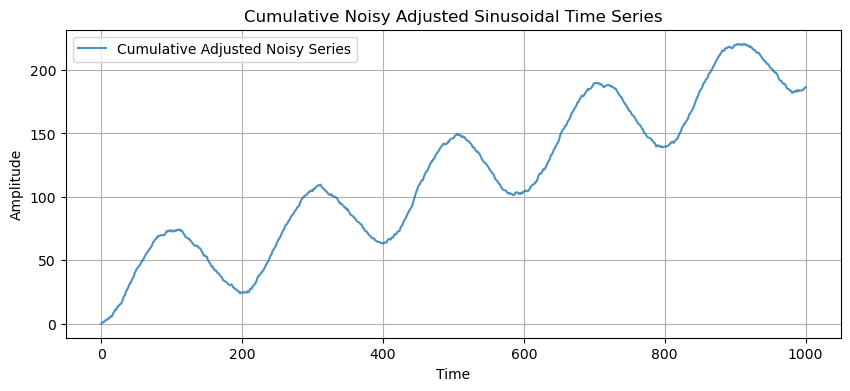

In [9]:

# Plot the noisy time series
plt.figure(figsize=(10, 4))
plt.plot(t, cumulative_adjusted_series, linestyle='-', alpha=0.8, label='Cumulative Adjusted Noisy Series')
plt.title("Cumulative Noisy Adjusted Sinusoidal Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

In [18]:

def plotMinFFD():
    from statsmodels.tsa.stattools import adfuller
    path, instName = './', 'Sinusoidal_Method12'
    out = pd.DataFrame(columns=['adfStat', 'pVal', 'lags', 'nObs', '95% conf', 'corr'])
    # df0 = pd.read_csv(path + instName + '.csv', index_col=0, parse_dates=True)
    df0=pd.DataFrame(cumulative_adjusted_series, index=t, columns=['Close'])
    for d in np.linspace(0, 1, 11):
        df1 = np.log(df0[['Close']]) # downcast to daily obs
        df2 = my_afml_fncs.fracDiff(df1, d, thres=.01)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0, 1]
        df2 = adfuller(df2['Close'], maxlag=1, regression='c', autolag=None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]  # with critical value
    out.to_csv(path + instName + '_testMinFFD.csv')
    out[['adfStat', 'corr']].plot(secondary_y='adfStat')
    mpl.axhline(out['95% conf'].mean(), linewidth=1, color='r', linestyle='dotted')
    mpl.savefig(path + instName + '_testMinFFD.png')
    return

In [19]:
plotMinFFD()

/home/mmx/PycharmProjects/AFML/my_afml_fncs.py:474: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF, df_ = series[[name]].fillna(method='ffill').dropna(), pd.Series()


ValueError: shapes (1,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)